<a href="https://colab.research.google.com/github/Makmok35/notebooks/blob/main/Actividad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2. Selección de un motor de inducción

Se quiere accionar una bomba centrífuga para elevar un caudal de agua Q. Se tiene alimentación eléctrica a 400 V. Los datos con los que se trabajarán son los siguientes:


*   Velocidad de giro bomba: 1460 rpm
*   Altura de impulsión $H_i$ : 32 m
*   Altura de aspiración $H_a$ : 5 m
*   Pérdidas de carga en aspiración e impulsión $H_p$ : 8.5 m
*   Rendimiento bomba : $70\%$

*   Caudal de la bomba : $Q \ (m^3/h)$

donde Q cambia en función de la última cifra del DNI. En mi caso, la última cifra del DNI es 5, por tanto:
$$Q \ = 130 \ m^3/h $$

In [ ]:
# Datos
n = 1460 #rpm
Hi = 32
Ha = 5
Hp = 8.5
rend_b = 0.7
V = 400

# Caudal Q
Q = 130 #m^3/h
print(f"Q = {Q} m^3/h")

Q = 130 m^3/h


Los apartados a determinar se muestran a continuación

## 1. Expresión del par resistente de la bomba, sabiendo que es una expresión cuadrática de la velocidad de giro ($M_r \ = AΩ^2 + B$) y que el par de arranque es el 15% del nominal

Para determinar el par resistente de la bomba, es necesario tener qué potencia suministra esta, cuya expresión es:
$$ P_b = \frac{\rho gHQ}{η_b},$$
donde:
* $\eta_b = 0.7$, rendimiento de la bomba
* $\rho \ = 1000 \ kg/m^3$, densidad del agua, fluido que elevará
* $g = 9.81 \ m/s^2$, aceleración de la gravedad
* $H$, diferencia de altura entre dónde se encuentra la bomba, y a dónde se desagua, sumando las pérdidas. En el caso que nos ocupa:
$$H = (H_i + H_a + H_p) \ m$$

In [ ]:
rho = 1000 #kg/m^3
g = 9.81 #m/s`2
H = Hi + Ha + Hp #m
Q = 130/3600 #vonversión m^3/s

Pb = rho*g*H*Q / rend_b

print(f"Pb = {(Pb*1e-3):.2f} kW")

Pb = 23.03 kW


Una vez obtenida la potencia de la bomba, $P_b = 23.03 \ kW$, se calcula el par nominal de giro $M_n$

In [ ]:
import numpy as np

omega_n = n *(2*np.pi/60) #velocidad de giro en rad/s
omega_n

152.89084247470325

La velocidad de giro aportada en el enunciado es la nominal. Por tanto:

$$M_n = \frac{P_b}{Ω_n}$$

In [ ]:
Mn = Pb/omega_n
print(f"Mn = {Mn:.2f} Nm")

Mn = 150.61 Nm


Se especifica que el par de arranque es el 15% del par nominal: $M_{arr} = 0.15 M_n$

In [ ]:
M_arr = 0.15*Mn
print(f"M_arr = {M_arr:.2f} Nm")

M_arr = 22.59 Nm


A la hora de calcular el par resistente, $M_r$, consideramos 2 puntos para poder obtener los parámetros de la curva y, por tanto, calcular A y B ($M_r = A\Omega^2 + B$).

* El primero de ellos, es el punto nominal de funcionamiento ($M_n$, $Ω$)
* El segundo punto de funcionammiento, es aquel del par de arranque. En el momento del arranque, $M_{arr}$, se tiene $\Omega_{arr} = 0$

$$
\left\{ M_n = A\Omega_n^2 + B\ \atop M_{arr} = A \cdot 0 + B\right. $$

In [ ]:
B = M_arr

Por tanto,
$$
\left\{ B = M_{arr} = 22.59 \ Nm \atop A =
(M_n-M_{arr})/{\Omega_n^2}
\right.$$


In [ ]:
A = (Mn - M_arr) / (omega_n**2)
print(f"A = {A:.5f}")

A = 0.00548


La expresión de $M_r$ quedaría: **$M_r = 0.00548Ω^2 + 22.59 \ Nm$**

## 2. Seleccione un motor capaz de proporcionar el par y la potencia adecuados para esta bomba (Marelli Motori)

Se necesita un motor que tenga capacidad suficiente como para proporcionar la potencia calculada en el apartado 1 y el par nominal, es decir: $P = 23.03 \ kW$ y $n = 1460 \ rpm$. Además, tenemos una tensión de 400 V

Cabe destacar que es necesario conocer el número de pares de polos que tiene el motor, obtenido de la fórmula siguiente:
$$ n_s = \frac{60f}{p},$$
donde $p$ es el número de pares de polos, y $f$ es la frecuencia, constante en la UE, $f = 50 \ Hz$. La expresión quedaría, para el caso que nos ocupa:

$$n_s = \frac{3000}{p}$$
Por otro lado, la velocidad de giro nominal es de 1460 rpm, por lo que la más cercana en pares de polos enteros es 2, que daría una velocidad de sincronismo de $n_s= 1500 \ rpm $.

El número de pares de polos sería: $p = 2$.



____
El primer motor cuyas especificaciones nos permite alimentar la bomba es el siguiente:

**Motor A5C 200 L4**:
* Rated Output: $P = 30 \ kW$
* Velocidad de giro nominal: $n_N = 1465 \ rpm$
* Eficiencia para índices de carga:
  * Plena carga: $η = 92.4 \ \%$
  * 3/4 carga: $η = 93.0\ \%$
  * 1/2 carga: $η = 92.7 \ \%$
* Factor de potencia : $cos ϕ = 0.89$
* Par nominal : $T_n = 196 \ Nm$



In [ ]:
n_N = 1465 #rpm
fp = 0.89
Tn = 196 #Nm
Ts = 2.6*Tn #Nm

## 3. Determine el punto de funcionamiento sobre la curva par-velocidad del conjunto motor-bomba


El punto de funcionamimento del conjunto vendrá dado por el punto en el cual corten la curva del par motor con la curva de funcionamiento de la bomba.

Para ello, se asume que el punto de funcionamiento para el par motor estará en la zona que se aproxima lineal, con deslizamiento pequeño, entre los dos puntos que se consideran a continuación:

- Punto nominal de funcionamiento, donde a $n_N$ se tiene un par nominal $T_n$
- Punto obtenido con la velocidad de sincronismo, donde a $n_s$ se tiene $T = 0$

Si se supone una recta de la forma $T = a_1 n + a_0$:

$$\left\{(n_N, T_n) → T_n = a_1n_N + a_0 \atop (n_s, 0) → 0 = a_1n_s + a_0\right.$$

De lo que se deduce que:

$$a_0 = \frac{-n_sT_n}{n_N-n_s}, \ a_1 = \frac{T_n}{n_N-n_s}$$.

La ecuación de la recta quedaría, por tanto,
$$T(n) = \frac{T_n}{n_N-n_s} (n-n_s)$$


In [ ]:
ns = 1500 * (2*np.pi/60)
n_N = 1465 * (2*np.pi/60)
a0 = ns*Tn/(ns-n_N)
a1 = -Tn/(ns-n_N)

print(f"a0 = {a0:.2f}, a1 = {a1:.2f}")

a0 = 8400.00, a1 = -53.48


Una vez sustituidos los valores y convirtiendo a rad/s: $T(Ω) = -53.48Ω + 8400$

El punto de funcionamiento del conjunto motor-bomba queda definido como la intersección de la curva de la bomba del Apartado 1 con la recta recién obtenida. El sistema a determinar es el siguiente:

$$\left\{ T = 0.00548Ω^2 + 22.59 \atop T = -53.48Ω + 8400  \right.$$

Se resuelve con código este sistema de ecuaciones a continuación a través del comando fsolve. Por ello:

$$ \left\{f_1 ≡ T - 0.00548Ω^2 - 22.59 = 0 \atop f_2 ≡ T + 53.48Ω - 8400 = 0 \right.$$

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def f(variables):
  T, omega = variables
  f1 = T -0.00548*omega**2 - 22.59
  f2 = T + abs(a1)*omega - 8400
  return [f1,f2]

#Iterante inicial
f0 = [160, 150]

f_sol = fsolve(f, f0)

print("Punto de funcionamiento del motor:")
print(f"T = {f_sol[0]:.2f} Nm, n = {f_sol[1]*60/(2*np.pi):.2f} rpm")

Punto de funcionamiento del motor:
T = 152.93 Nm, n = 1472.69 rpm


### Gráfica conjunto motor-bomba
Se realiza la gráfica de la intersección para tener una prueba gráfica de que el punto de funcionamiento obtenido entra dentro de la zona lineal antes comentada.


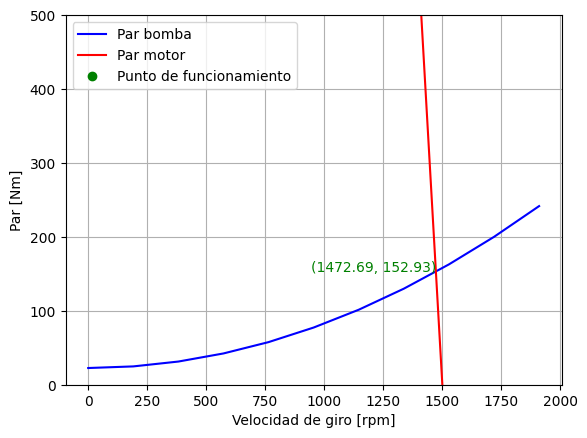

In [51]:
import matplotlib.pyplot as plt
valores_n = np.array([x*20*60/(2*np.pi) for x in range(0,11)])
valores_n

def T1 (omega):
  return A * np.array(omega)**2 + B

def T2 (omega):
  return a1*np.array(omega) + a0

plt.plot(valores_n, T1(valores_n*2*np.pi/60), label="Par bomba", color="blue")
plt.plot(valores_n, T2(valores_n*2*np.pi/60), label="Par motor", color="red")
plt.text(f_sol[1]*60/(2*np.pi), f_sol[0], f"({f_sol[1]*60/(2*np.pi):.2f}, {f_sol[0]:.2f})",
         fontsize=10, ha="right", color="green")
plt.plot(f_sol[1]*60/(2*np.pi), "o", color="green", label="Punto de funcionamiento")
plt.xlabel("Velocidad de giro [rpm]")
plt.ylabel("Par [Nm]")
plt.legend()
plt.grid(True)
plt.ylim(0,500)
plt.show()